## Halos

I create two plots showing the distribution of halos in shells. The first plot is a 3D plot showing the spatial positions, while the second one ignores the azimuthal coordinate to better show that the halos lie within two concentric shells.

In [15]:
from halos import Catalog, SnapsInfo
import matplotlib.pyplot as plt
import healpy as hp
import numpy as np
%matplotlib inline

In [16]:
snapshot_number = 60
mass_inf = 1e3

In [17]:
info = SnapsInfo()
catalog = Catalog(snapshot_number)

print(f"Numer of halos: {catalog.get_n_halos()}")
catalog_selection = catalog.select_mass_above(mass_inf)
print(f"Number of halos (M>1e3): {catalog_selection.get_n_halos()}")
del catalog
catalog_selection.computer_all()

Reading AllSkyMock_snap_060_0.bin0...
Reading AllSkyMock_snap_060_1.bin0...
Reading AllSkyMock_snap_060_2.bin0...
Reading AllSkyMock_snap_060_3.bin0...
Numer of halos: 45050
Number of halos (M>1e3): 8229


100%|██████████████████████████████████████| 8229/8229 [00:12<00:00, 680.94it/s]


-------------- (np.float64(0.0), 62) --------------
Reading KappaMap_snap_062.DM.seed_100672.fits...
Calculating convergence contribution from KappaMap_snap_062.DM.seed_100672.fits... 

-------------- (np.float64(0.01815), 61) --------------
Reading KappaMap_snap_061.DM.seed_100672.fits...
Calculating convergence contribution from KappaMap_snap_061.DM.seed_100672.fits... 

-------------- (np.float64(0.05545), 60) --------------
Reading KappaMap_snap_060.DM.seed_100672.fits...
Calculating convergence contribution from KappaMap_snap_060.DM.seed_100672.fits... 



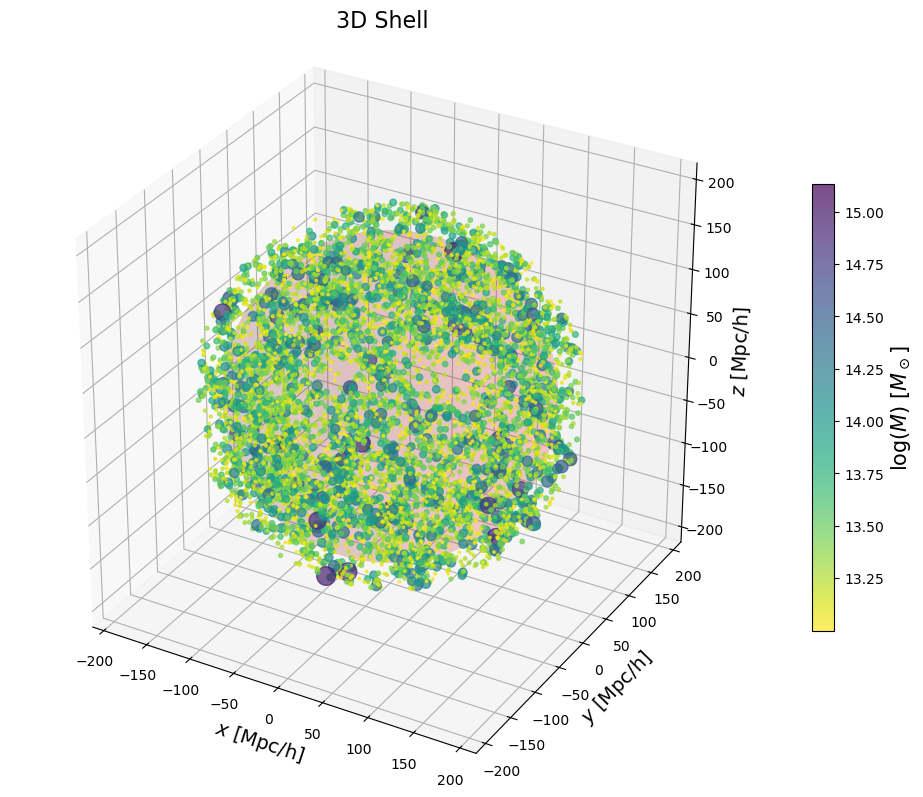

In [81]:
# Definisci il raggio della sfera
raggio = info.from_snapshot_get(snapshot_number, 'distance')/10**3

# Crea gli angoli sferici (theta, phi)
theta = np.linspace(0, 2 * np.pi, 100)  # Angolo azimutale
phi = np.linspace(0, np.pi, 100)        # Angolo zenitale

# Creare una griglia di punti sferici
theta, phi = np.meshgrid(theta, phi)

# Converti le coordinate sferiche in cartesiane
x_sfera = raggio * np.sin(phi) * np.cos(theta)
y_sfera = raggio * np.sin(phi) * np.sin(theta)
z_sfera = raggio * np.cos(phi)

# Crea il plot 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot dei dati degli aloni
sc = ax.scatter(catalog_selection.pos_x/10**3,
                catalog_selection.pos_y/10**3,
                catalog_selection.pos_z/10**3,
                c=10 + np.log10(catalog_selection.mass), 
                cmap='viridis_r', 
                s=0.0005 * np.log10(catalog_selection.mass)**8,
                alpha=0.7)

# Aggiungi una barra colori per rappresentare la massa
cb = plt.colorbar(sc, ax=ax, shrink=0.6)
cb.set_label(rf'$\log(M)$ [$M_\odot$]', fontsize=15)

# Configura gli assi
ax.set_xlabel(r'$x$ [Mpc/h]', fontsize=14)
ax.set_ylabel(r'$y$ [Mpc/h]', fontsize=14)
ax.set_zlabel(r'$z$ [Mpc/h]', fontsize=14)
ax.set_title('3D Shell', fontsize=16)

# Imposta la stessa unità per tutti gli assi (distanza uguale su tutti gli assi)
ax.set_box_aspect([1, 1, 1])  # Impostazione uguale per tutti gli assi

# Traccia la sfera
ax.plot_surface(x_sfera, y_sfera, z_sfera, color='r', alpha=0.1)

# Ottimizzazione della disposizione e degli spazi
plt.tight_layout()

# Mostra il grafico
plt.show()


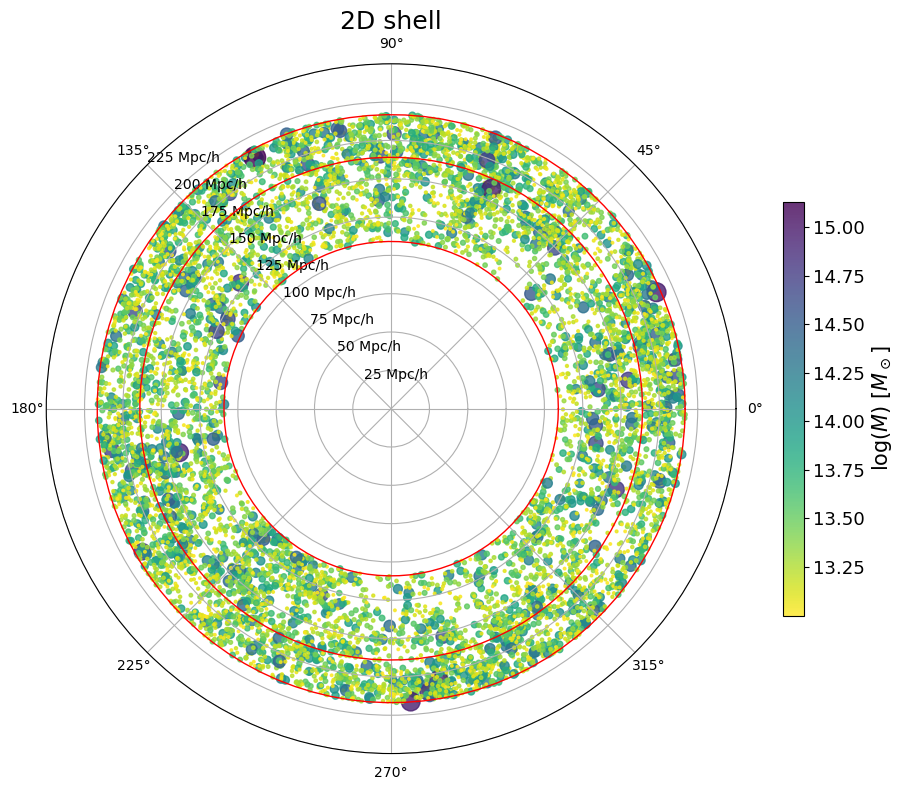

In [76]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))  # Dimensioni aumentate

# Scatter plot: posizione degli aloni nel piano (distanza vs angolo azimutale)
sc = ax.scatter(catalog_selection.phi, catalog_selection.distance/(10**3), 
                c=10 + np.log10(catalog_selection.mass), 
                cmap='viridis_r', 
                s=0.0005 * np.log10(catalog_selection.mass)**8, 
                alpha=0.8)

# Aggiungi cerchi con raggi specifici
radii = [info.from_snapshot_get(snapshot_number, 'xstart')/(10**3),
         info.from_snapshot_get(snapshot_number, 'distance')/(10**3),
         info.from_snapshot_get(snapshot_number, 'xend')/(10**3)]

for radius in radii:
    ax.plot(np.linspace(0, 2 * np.pi, 100), np.full(100, radius), 
            lw=1, color='red')

# Barra colori
cb = plt.colorbar(sc, ax=ax, shrink=0.6)
cb.set_label(rf'$\log(M)$ [$M_\odot$]', fontsize=15)
cb.ax.tick_params(labelsize=13)

# Configurazione degli assi
ax.set_title('2D shell', fontsize=18)

# Modifica dei label per coordinate polari
ax.set_rlabel_position(135)


ax.set_rticks([25, 50, 75, 100, 125, 150, 175, 200, 225])
ax.set_yticklabels([f"{r} Mpc/h" for r in [25, 50, 75, 100, 125, 150, 175, 200, 225]])


plt.tight_layout()
plt.show()


Now I use the known data to calculate the luminosity distance corrected according to Bertacca and create two Mollview plots.

In [82]:
snapshot_number = 40
mass_inf = 1e3
n_side = 128
n_pix = hp.nside2npix(n_side)

info = SnapsInfo()
catalog = Catalog(snapshot_number)
print(f"Numer of halos: {catalog.get_n_halos()}")
catalog_selection = catalog.select_mass_above(mass_inf)
print(f"Number of halos (M>1e3): {catalog_selection.get_n_halos()}")
del catalog
catalog_selection.compute_all(n_side=n_side)

#print(catalog_selection.get_halo(0).luminosity_distance,
#      catalog_selection.get_halo(0).luminosity_distance_bert_convergence,
#      catalog_selection.get_halo(0).luminosity_distance_bert_v_parallel,
#      catalog_selection.get_halo(0).distance_bertacca,
#      catalog_selection.get_halo(0).dr,
#      catalog_selection.get_halo(0).theta)

Reading AllSkyMock_snap_040_0.bin0...
Reading AllSkyMock_snap_040_1.bin0...
Reading AllSkyMock_snap_040_2.bin0...
Reading AllSkyMock_snap_040_3.bin0...
Numer of halos: 14517825
Number of halos (M>1e3): 1958848


100%|████████████████████████████████| 1958848/1958848 [56:00<00:00, 582.98it/s]


-------------- (np.float64(0.0), 62) --------------
Reading KappaMap_snap_062.DM.seed_100672.fits...
Downgrading KappaMap_snap_062.DM.seed_100672.fits...
Calculating convergence contribution from KappaMap_snap_062.DM.seed_100672.fits... 

-------------- (np.float64(0.01815), 61) --------------
Reading KappaMap_snap_061.DM.seed_100672.fits...
Downgrading KappaMap_snap_061.DM.seed_100672.fits...
Calculating convergence contribution from KappaMap_snap_061.DM.seed_100672.fits... 

-------------- (np.float64(0.05545), 60) --------------
Reading KappaMap_snap_060.DM.seed_100672.fits...
Downgrading KappaMap_snap_060.DM.seed_100672.fits...
Calculating convergence contribution from KappaMap_snap_060.DM.seed_100672.fits... 

-------------- (np.float64(0.07461), 59) --------------
Reading KappaMap_snap_059.DM.seed_100672.fits...
Downgrading KappaMap_snap_059.DM.seed_100672.fits...
Calculating convergence contribution from KappaMap_snap_059.DM.seed_100672.fits... 

-------------- (np.float64(0.094

Same pixel encountered 5601 times.


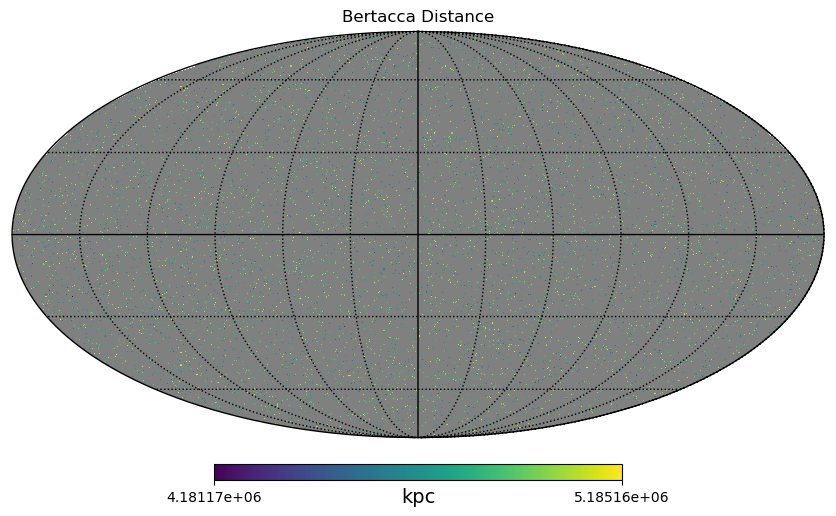

In [9]:
bertacca_map = catalog_selection.bertacca_map(n_side=n_side)
halos_map = catalog_selection.halos_map(n_side=n_side)

masked_map = hp.ma(bertacca_map)
masked_map.mask = bertacca_map == 0

hp.mollview(masked_map, title="Bertacca Distance", unit="kpc")
hp.graticule()
plt.show()

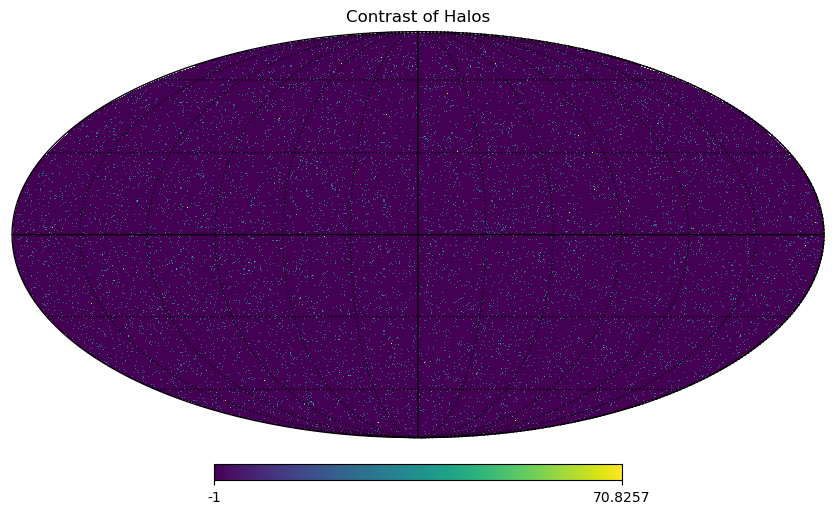

In [10]:
mean_halo_count = np.mean(halos_map)
halo_contrast = (halos_map - mean_halo_count) / mean_halo_count
hp.mollview(halo_contrast, title="Contrast of Halos", unit="")
hp.graticule()
plt.show()